# Rheological analysis of perihepatic abscess creep behavior

This notebook demonstrates the use of the `pyRheo` library to fit the creep behavior of a perihepatic abscess. The experimental data includes angular frequency (`time`) and the Creep Compliance (`J_creep`), which are analyzed using a rheological model. The data is from Jesús Puente-Córdova's archive.

We import the following libraries:
- `pandas`: For handling the experimental data in tabular format.
- `numpy`: For numerical operations and transformations.
- `matplotlib.pyplot`: For creating visualizations of the data and model predictions.
- `pyRheo.creep_model.CreepModel`: To perform rheological model fitting and analysis of the Creep Compliance (`J_creep`) data.



In [1]:
# Import required libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
from pyRheo.creep_model import CreepModel  # For rheological modeling


# Load and inspect rheological data
This cell loads experimental data from a CSV file containing:
- Angular frequency (`time`) in [rad/s].
- Creep Compliance (`J_creep`) in [1/Pa].

The data is loaded using `pandas` and the first few rows are displayed for verification.


In [2]:
# Load rheological data from a CSV file
# The file contains time (time) and relaxation (J_creep, ) data.
data = pd.read_csv('./data/perihepatic_abscess/creep_perihepatic_data.csv', delimiter='\t', decimal=".")

# Extract time and relaxation as numpy arrays
time = data['Time'].values
J_creep = data['Creep Compliance'].values

# Display the first few rows of the data for verification
data.head()


,Time,Creep Compliance
0,0.010000,0.024139
1,0.010243,0.022159
2,0.010493,0.024002
3,0.010748,0.024553
4,0.011009,0.025381


# Initialize and fit the rheological model
In this cell:
1. The `CreepModel` class is instantiated with parameters for model fitting:
   - Automatic model selection.
   - Random initial guesses for optimization.
   - 64 guesses for the optimizer to explore.
   - The Powell algorithm for minimization.
2. The model is fitted to the experimental data (`time`, `J_creep`, and ``).
3. Fitted model parameters and error metrics are displayed.


In [3]:
# Set bounds

# Initialize the rheological model with specific fitting parameters
model = CreepModel(
    model="auto",                   # Automatically selects the best model
    initial_guesses="random",       # Uses random initial guesses
    num_initial_guesses=10,         # Number of initial guesses for the optimizer
    minimization_algorithm="Powell",  # Optimization algorithm
    mittag_leffler_type="Pade32"
)

# Fit the model to the experimental data
model.fit(time, J_creep)

# Print the fitted parameters and error metrics
model.print_parameters()  # Display model parameters
model.print_error()       # Display error of the fit
model.get_parameters()


Predicted Model: FractionalKelvinVoigt


/m/home/home8/81/mirandi1/data/Downloads/pyRheo/pyRheo/rheo_models/creep_models.py:320: RuntimeWarning: overflow encountered in scalar power
  tau_c = (V / G)**(1 / (alpha - beta))


Best initial guess was: [43.66200792918491, 179.19049520073168, 0.6192240183421087, 0.6143893767919271]
G: 0.11593390261226716
V: 0.47971736721545805
alpha: 0.9799531831816574
beta: 0.006890527786667356
RSS: 0.2728961426496809
Mean Percentage Error: 2.57%


/m/home/home8/81/mirandi1/data/Downloads/pyRheo/pyRheo/rheo_models/creep_models.py:324: RuntimeWarning: overflow encountered in divide
  z = -np.power(np.divide(t, tau_c), alpha - beta)
/m/home/home8/81/mirandi1/data/Downloads/pyRheo/pyRheo/mittag_leffler/ml_pade32.py:25: RuntimeWarning: invalid value encountered in divide
  R_val = (1 / gamma(beta - alpha)) * (numerator / denominator)


{'G': 0.11593390261226716,
 'V': 0.47971736721545805,
 'alpha': 0.9799531831816574,
 'beta': 0.006890527786667356,
 'RSS': 0.2728961426496809}

# Generate and plot model fit
In this cell:
1. Predictions are generated using the fitted model at logarithmically spaced times.
2. The experimental data and model predictions are visualized using a quick plot from the `pyRheo` library.


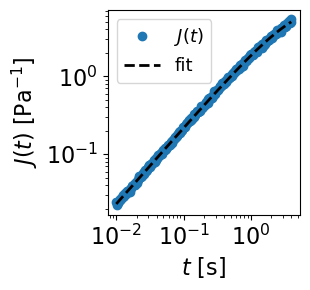

In [4]:
# Generate predictions using the fitted model for a smooth curve
time_predict = np.logspace(np.min(np.log10(time)), np.max(np.log10(time)), 100)
J_creep_predict = model.predict(time_predict)

# Plot the experimental data and the model prediction
model.plot(time, J_creep, savefig=True)  # Quick overview plot


# Create a customized plot
This cell generates a detailed J_creep, , publication-quality plot:
1. The experimental data and the model predictions are plotted together.
2. Both axes are set to logarithmic scales to represent the data more effectively.
3. Axis labels, legend, and tick font sizes are adjusted for readability.


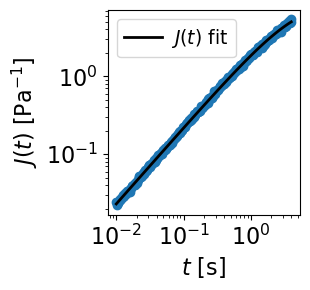

In [5]:
#import scienceplots

# Ensure the 'scienceplots' style is used for better visualization
#plt.style.use(['science', 'nature', 'bright'])

# Create a new figure with adjusted size for better visualization
plt.figure(figsize=(3.2, 3))

# Plot experimental data
plt.plot(time, J_creep, 'o', markersize=6, markevery=1, alpha=1)

# Plot the model predictions
plt.plot(time_predict, J_creep_predict, '-', color="k", lw=2, label='$J(t)$ fit')


# Set logarithmic scales for both axes
plt.xscale("log")
plt.yscale("log")

# Customize axis labels, ticks, and font sizes
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$t$ [s]', fontsize=16)
plt.ylabel(r'$J(t)$ [Pa$^{-1}$]', fontsize=16)

# Add a legend with customized font size
plt.legend(fontsize=13.5, handletextpad=0.5)

# Final plot adjustments for readability
plt.grid(False)
plt.tight_layout()

# Display the plot
plt.show()
